In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

In [4]:
Fs = 1000;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1500;             # Length of signal
t = np.arange(0, L)*T       # Time vector

In [5]:
S = 0.7*np.sin(2*np.pi*10*t) + 2.0*np.sin(2*np.pi*50*t)+(np.random.random())

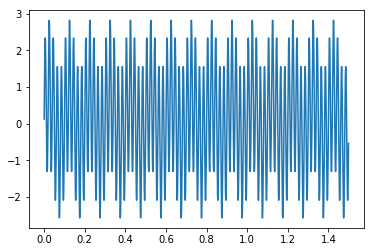

In [6]:
plt.plot(t,S)

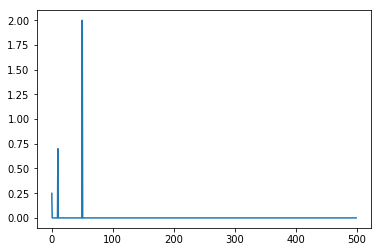

In [7]:
four = np.fft.fft(S)
half = int(len(four)/2)
four = 2*np.absolute(four[:half]/L)
f = Fs*np.arange(0, L/2)/L
plt.plot(f, four)

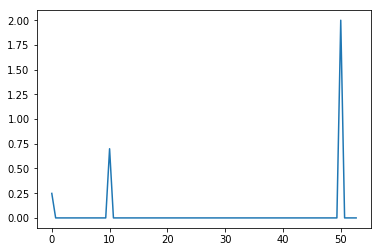

In [8]:
plt.plot(f[0:80], four[0:80])

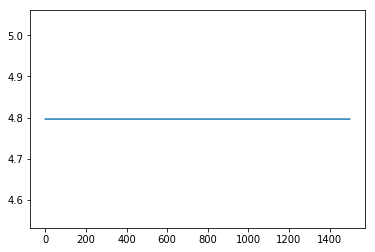

In [40]:
y = S - 0.7*np.sin(2*np.pi*10*t) - 2.0*np.sin(2*np.pi*50*t)
plt.plot(y)